Bonus Part: Problem 1

In [1]:
import numpy as np
import maze as mz 
import matplotlib.pyplot as plt

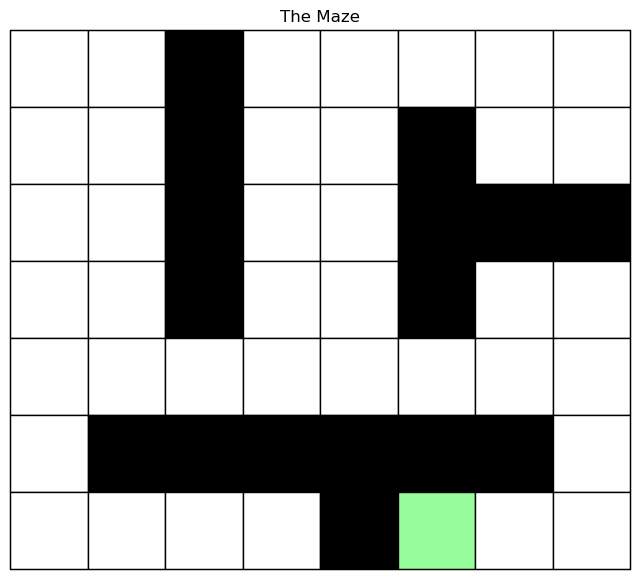

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

mz.draw_maze(maze)
# Create an environment maze
env = mz.Maze(maze, False)
# env.show()

In [ ]:
# Solve the problem using value iteration for parity check
gamma   = 49/50; # Discount factor
# Accuracy treshold 
epsilon = 0.001;
V, policy = mz.value_iteration(env, gamma, epsilon)

method = 'ValIter';
start  = (0,0,6,5,0);
path = env.simulate(start, policy, method)

# Show the shortest path 
mz.animate_solution(maze, path)
print('Optimal value of initial state ' + str(V[env.get_state_id(start)]))

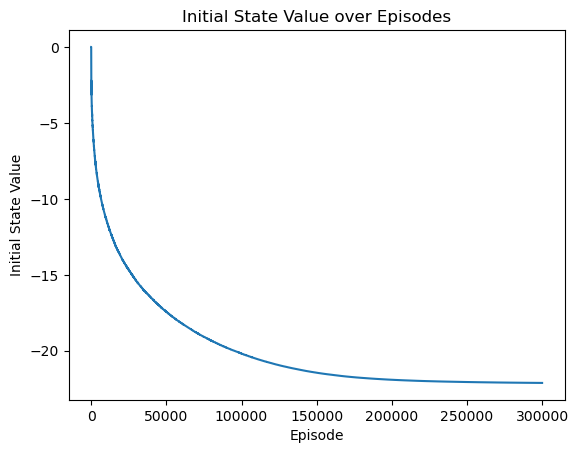

In [3]:
# Q-learning
# Parameters for trial 1
start  = (0,0,6,5,0); # Initial position
gamma   = 49/50; # Discount factor
epsilon = 0.25; # Exploration factor
stepsize_exp = 2/3;
no_episodes = 300000; 
Q, policyQ, init_s_value, episode_rewards = mz.Q_learning(env, start, gamma,stepsize_exp, epsilon, no_episodes, True)
# Parameters for trial 2
epsilon2 = 0.75; # Exploration factor
stepsize_exp2 = 2/3;
Q2, policyQ2, init_s_value2, episode_rewards2 = mz.Q_learning(env, start, gamma,stepsize_exp2, epsilon2, no_episodes, True)


In [ ]:
#Create plot for Task i
fig = plt.figure
plt.plot(np.arange(0, no_episodes), init_s_value, label = 'epsilon = ' + str(epsilon))
plt.plot(np.arange(0, no_episodes), init_s_value2, label = 'epsilon = ' + str(epsilon2))
# Set plot labels and title
plt.xlabel('Episode')
plt.ylabel('V(s_1)')
plt.title('Initial State Value over Episodes')
plt.legend()
# Display the final plot
plt.show()

In [ ]:
# Different step sizes
epsilon = 0.2; # Exploration factor
stepsize_exp = 2/3;
stepsize_exp2 = 1
no_episodes = 200000; 
Q3, policyQ3, init_s_value3, episode_rewards3 = mz.Q_learning(env, start, gamma,stepsize_exp, epsilon, no_episodes, True)
Q4, policyQ4, init_s_value4, episode_rewards4 = mz.Q_learning(env, start, gamma,stepsize_exp2, epsilon2, no_episodes, True)

fig = plt.figure
plt.plot(np.arange(0, no_episodes), init_s_value3, label = 'alpha = ' + str(stepsize_exp))
plt.plot(np.arange(0, no_episodes), init_s_value4, label = 'alpha = ' + str(stepsize_exp2))
# Set plot labels and title
plt.xlabel('Episode')
plt.ylabel('V(s_1)')
plt.title('Initial State Value over Episodes')
plt.legend()
# Display the final plot
plt.show()

In [ ]:
# Animate Q-learning solution
method = 'QLearning';
start  = (0,0,6,5,0);
path = env.simulate(start, policy, method);
# Show the shortest path 
mz.animate_solution(maze, path)

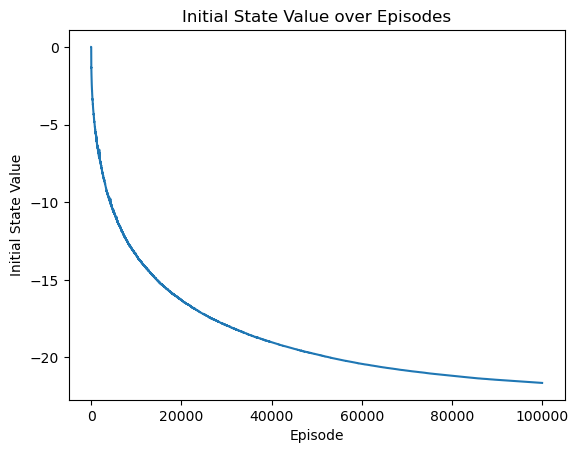

In [4]:
# SARSA
start  = (0,0,6,5,0); # Initial position
gamma   = 49/50; # Discount factor
epsilon = 0.1; # Exploration factor
exploration_exp = 1; # Exploration decay exponent
stepsize_exp = 2/3; # Stepsize exponen
no_episodes = 100000; 
Q_sarsa, policy_sarsa, init_s_value_sarsa, episode_rewards_sarsa = mz.SARSA_learning(env, start, gamma,stepsize_exp, epsilon, no_episodes, exploration_exp, True, True)
Q_sarsa2, policy_sarsa2, init_s_value_sarsa2, episode_rewards_sarsa2 = mz.SARSA_learning(env, start, gamma,stepsize_exp, 0.2, no_episodes, exploration_exp, False, True)

In [ ]:
# Plot convergence of initial state value
fig = plt.figure
plt.plot(np.arange(0, no_episodes), init_s_value_sarsa, label = 'epsilon = ' + str(0.1))
plt.plot(np.arange(0, no_episodes), init_s_value_sarsa2, label = 'epsilon = ' + str(0.2))
# Set plot labels and title
plt.xlabel('Episode')
plt.ylabel('V(s_1)')
plt.title('Initial State Value over Episodes')
plt.legend()
# Display the final plot
plt.show()

In [ ]:
# Animate Solution 
method = 'SARSA';
start  = (0,0,6,5,0);
path = env.simulate(start, policy_sarsa2, method);
# Show the shortest path 
mz.animate_solution(maze, path)

In [5]:
# Estimate probability of getting out alive with Q-learning and SARSA policy
probab_exiting = mz.compute_POS(env, start, 10000, [] ,'QLearning', policyQ)
print('Probability of getting out alive with policy learned by Q-learning: ', probab_exiting)
probab_exiting2 = mz.compute_POS(env, start, 10000, [] ,'SARSA', policy_sarsa)
print('Probability of getting out alive with policy learned by SARSA-learning: ', probab_exiting2)

Probability of getting out alive with policy learned by Q-learning:  0.4657910527352167
Probability of getting out alive with policy learned by SARSA-learning:  0.5098793113045363
